In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [28]:
df = pd.read_csv("data/products.csv", index_col="id")
df.drop("url", inplace=True, axis=1)
df.category = df.category.astype("category")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19626 entries, 1 to 20268
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          19626 non-null  category
 1   title             19626 non-null  object  
 2   price             19626 non-null  int64   
 3   brand             19556 non-null  object  
 4   rating            19626 non-null  int64   
 5   reviews_quantity  19626 non-null  int64   
dtypes: category(1), int64(3), object(2)
memory usage: 939.9+ KB


In [30]:
category_counts = df.groupby(df.category)["title"].count()

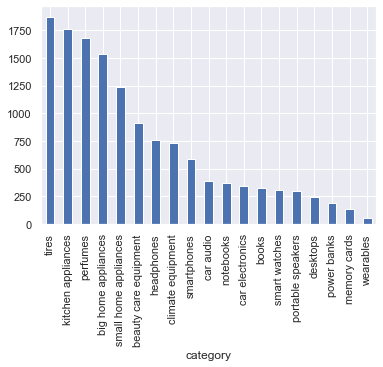

In [31]:
category_counts[~category_counts.index.isin(["computers"])].sort_values(ascending=False).plot.bar()

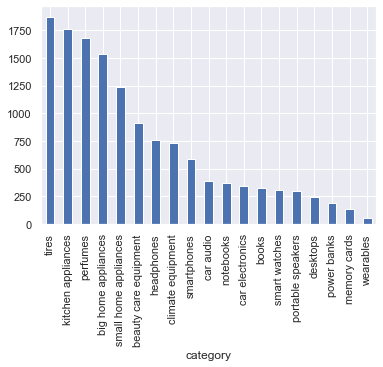

In [32]:
category_counts[~category_counts.index.isin(["computers"])].sort_values(ascending=False).plot.bar()

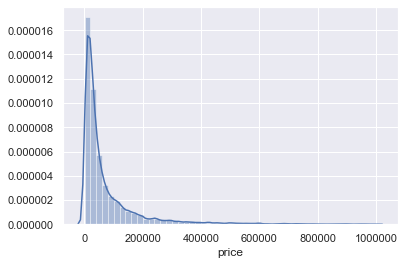

In [80]:
sns.distplot(df.price)

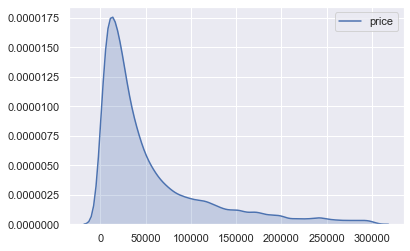

In [79]:
sns.kdeplot(df[df.price < 300000].price, shade=True)

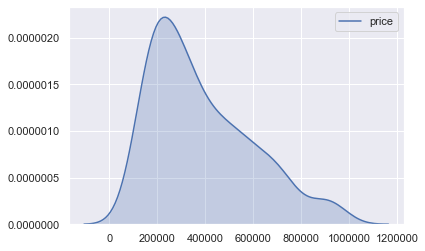

In [35]:
sns.kdeplot(df[df.category == 'notebooks'].price, shade=True)

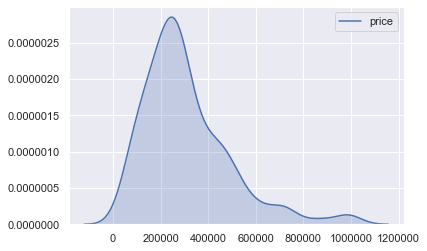

In [36]:
sns.kdeplot(df[df.category == 'desktops'].price, shade=True)

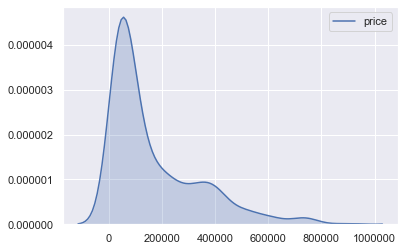

In [37]:
sns.kdeplot(df[df.category == 'smartphones'].price, shade=True)

In [38]:
df.category.cat.categories

Index(['beauty care equipment', 'big home appliances', 'books', 'car audio',
       'car electronics', 'climate equipment', 'computers', 'desktops',
       'headphones', 'kitchen appliances', 'memory cards', 'notebooks',
       'perfumes', 'portable speakers', 'power banks', 'small home appliances',
       'smart watches', 'smartphones', 'tires', 'wearables'],
      dtype='object')

In [39]:
rated_products = df[df.reviews_quantity > 0]
category_ratings = rated_products.groupby(rated_products.category)["rating"].mean().sort_values()

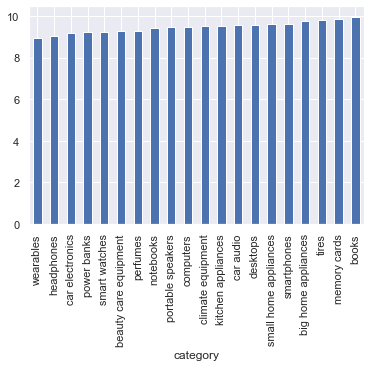

In [40]:
category_ratings.plot.bar()

In [41]:
ratings_count = rated_products.rating.value_counts().reindex(range(1, 11), fill_value=0)

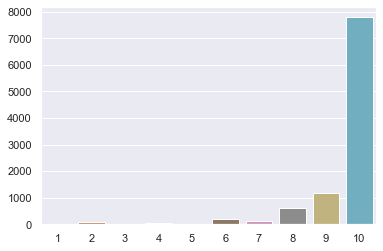

In [42]:
sns.barplot(x=ratings_count.index, y=ratings_count.values)

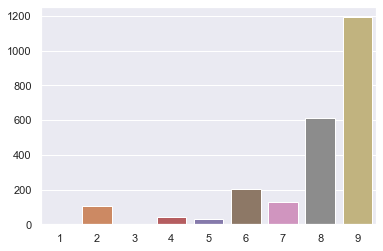

In [43]:
sns.barplot(x=ratings_count.index[:-1], y=ratings_count.values[:-1])

In [44]:
smartphones = df[df.category == "smartphones"]

In [45]:
smartphones.brand.unique()

array(['OPPO', 'Samsung', 'Apple', 'Xiaomi', 'Huawei', 'Vivo', 'Meizu',
       'Lenovo', 'TP-LINK', 'OnePlus', 'Nokia', 'Realme', 'Honor', 'BQ',
       'ZTE', 'TECNO', 'Prestigio', 'HTC', 'Google', 'Sony', 'Fly',
       'INOI', 'Gionee', 'DOOGEE', 'Haier', 'Jinga', 'teXet', 'LeEco',
       'Irbis', nan, 'Philips'], dtype=object)

In [46]:
POPULAR_BRANDS = ['OPPO', 'Samsung', 'Apple', 'Xiaomi', 'Huawei', 'Meizu', 'OnePlus', 'HTC']

In [47]:
smartphones = smartphones[(smartphones.brand.isin(POPULAR_BRANDS)) & (smartphones.reviews_quantity >= 10)]

In [48]:
smartphones

,category,title,price,brand,rating,reviews_quantity
id,,,,,,
17560,smartphones,OPPO A1k красный,48888,OPPO,10,122
17457,smartphones,Samsung Galaxy A10s 2/32Gb черный,55900,Samsung,10,771
17458,smartphones,Samsung Galaxy A20s 32Gb черный,65690,Samsung,10,588
17459,smartphones,Samsung Galaxy A51 4/64Gb Черный,108900,Samsung,10,320
17460,smartphones,Samsung Galaxy A51 6/128Gb Черный,120187,Samsung,10,230
...,...,...,...,...,...,...
17972,smartphones,Huawei Y5 2017 черный-серый,49800,Huawei,10,108
17978,smartphones,Huawei Ascend P9 Lite VNS-L21 золотистый,69990,Huawei,10,61
18035,smartphones,Huawei Y5 Lite 2018 DRA-LX5 1Gb черный,34700,Huawei,9,34


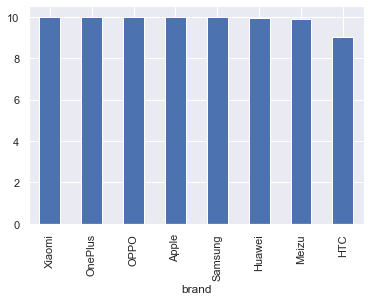

In [75]:
smartphones.groupby(smartphones.brand)["rating"].mean().sort_values(ascending=False).plot.bar()

In [50]:
smartphones.sort_values(by="reviews_quantity", ascending=False)[:10]

,category,title,price,brand,rating,reviews_quantity
id,,,,,,
17465,smartphones,Samsung Galaxy A10 черный,51217,Samsung,10,2074
17490,smartphones,Samsung Galaxy A50 4/64Gb черный,106500,Samsung,10,1887
17641,smartphones,Apple iPhone 6 32 Gb серый космос,159990,Apple,10,1866
17462,smartphones,Apple iPhone 7 32Gb черный,168000,Apple,10,1644
17467,smartphones,Samsung Galaxy A50 6/128Gb черный,104600,Samsung,10,1066
17464,smartphones,Xiaomi Redmi Note 8 4/64Gb Neptune синий,73880,Xiaomi,10,1022
17457,smartphones,Samsung Galaxy A10s 2/32Gb черный,55900,Samsung,10,771
17761,smartphones,Samsung Galaxy A7 SM-A750 2018 черный,97750,Samsung,10,768
17485,smartphones,Samsung Galaxy A10 красный,51390,Samsung,10,635


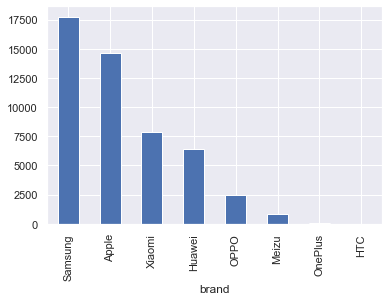

In [51]:
smartphones.groupby(smartphones.brand)["reviews_quantity"].sum().sort_values(ascending=False).plot.bar()

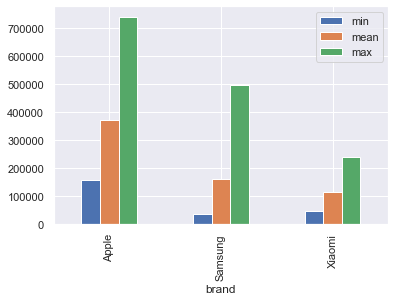

In [76]:
smartphones[smartphones.brand.isin(['Apple', 'Xiaomi', 'Samsung'])].groupby(smartphones.brand)["price"].agg(["min", "mean", "max"]).plot.bar()

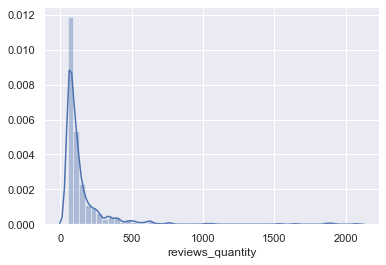

In [66]:
sns.distplot(df[df.reviews_quantity > 50].reviews_quantity)

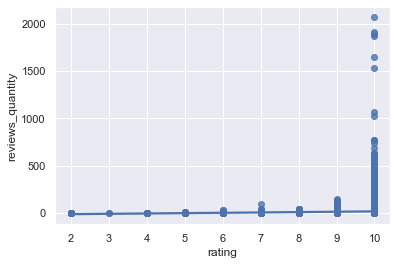

In [73]:
sns.regplot(rated_products.rating, rated_products.reviews_quantity)

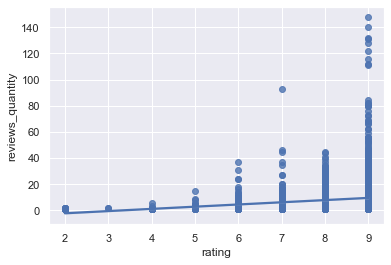

In [74]:
sns.regplot(rated_products[rated_products.rating < 10].rating, rated_products[rated_products.rating < 10].reviews_quantity)